<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1')
df # чтение файла


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
99000,544691,22948,METAL DECORATION NAUGHTY CHILDREN,24,23-02-2011 09:09,0.85,13804.0,United Kingdom
99001,544691,22084,PAPER CHAIN KIT EMPIRE,6,23-02-2011 09:09,2.95,13804.0,United Kingdom
99002,544691,22418,10 COLOUR SPACEBOY PEN,24,23-02-2011 09:09,0.85,13804.0,United Kingdom
99003,544691,22617,BAKING SET SPACEBOY DESIGN,3,23-02-2011 09:09,4.95,13804.0,United Kingdom


In [ ]:
from numpy import nan

def convert_to_float(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', nan).astype(float)
    return df[column_name]

df['Quantity'] = convert_to_float(df, 'Quantity')
df['UnitPrice'] = convert_to_float(df, 'UnitPrice')
df['InvoiceNo'] = convert_to_float(df, 'InvoiceNo')

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99005 entries, 0 to 99004
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    99005 non-null  float64
 1   StockCode    99005 non-null  object 
 2   Description  98707 non-null  object 
 3   Quantity     99005 non-null  float64
 4   InvoiceDate  99004 non-null  object 
 5   UnitPrice    99004 non-null  float64
 6   CustomerID   64478 non-null  float64
 7   Country      99004 non-null  object 
dtypes: float64(4), object(4)
memory usage: 6.0+ MB


колонка "CustomerID" выделяется, поэтому мы удаляем его

In [ ]:
df = df.drop(columns = ['CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate'])
df


,Description,Quantity,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom
1,WHITE METAL LANTERN,6.0,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,United Kingdom
...,...,...,...,...
99000,METAL DECORATION NAUGHTY CHILDREN,24.0,0.85,United Kingdom
99001,PAPER CHAIN KIT EMPIRE,6.0,2.95,United Kingdom
99002,10 COLOUR SPACEBOY PEN,24.0,0.85,United Kingdom
99003,BAKING SET SPACEBOY DESIGN,3.0,4.95,United Kingdom


<Axes: >

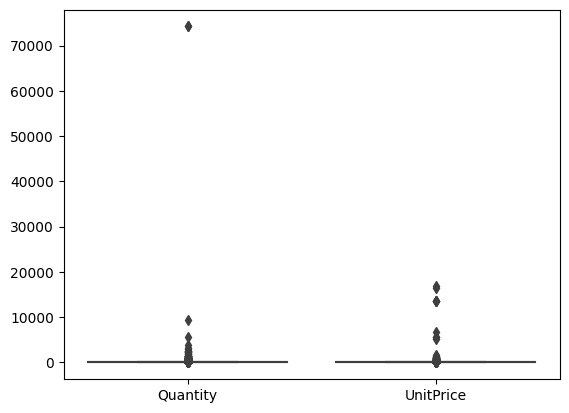

In [ ]:
sns.boxplot(df)

 Выбросы есть, поэтому их нужно удалить

In [ ]:
!pip install detectorusoutlierus==0.0.1b0


In [ ]:
from detectorusoutlierus import outliers as do


In [ ]:
#Методом среднего
outlier_detector = do.Outline(df)
columns = ['Quantity', 'UnitPrice']
for col in columns:
    outliers_kvart = outlier_detector.detect_outlier_mean_std(col)
    df = pd.concat([df, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df

,Description,Quantity,UnitPrice,Country
19,RECIPE BOX WITH METAL HEART,4.0,7.95,United Kingdom
26,ALARM CLOCK BAKELIKE PINK,24.0,3.75,France
27,ALARM CLOCK BAKELIKE RED,24.0,3.75,France
28,ALARM CLOCK BAKELIKE GREEN,12.0,3.75,France
29,PANDA AND BUNNIES STICKER SHEET,12.0,0.85,France
...,...,...,...,...
98966,CERAMIC CAKE STAND + HANGING CAKES,8.0,8.50,EIRE
98967,SMALL POPCORN HOLDER,400.0,0.72,EIRE
98968,COFFEE MUG APPLES DESIGN,36.0,2.10,EIRE
98969,COFFEE MUG PEARS DESIGN,36.0,2.10,EIRE


<Axes: >

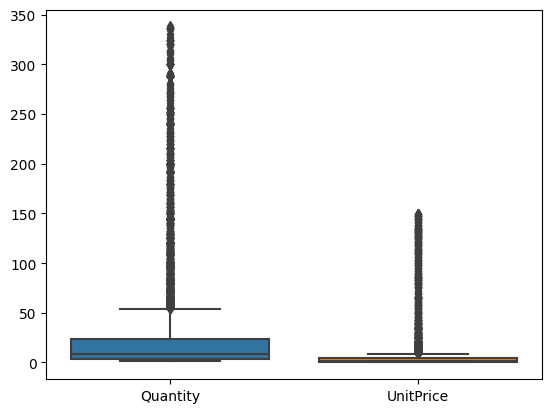

In [ ]:
sns.boxplot(df)

убрали выбросы)

In [ ]:
df_cluster = df.copy()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>]], dtype=object)

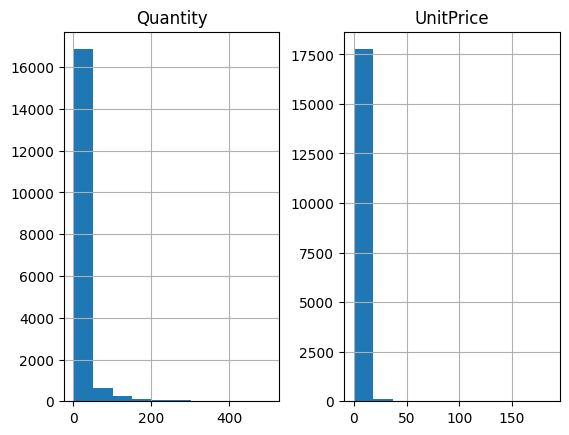

In [ ]:
df_cluster.hist()

In [ ]:
df_cluster = df[['UnitPrice', 'Quantity']]
df_cluster

,UnitPrice,Quantity
19,7.95,4.0
29,0.85,12.0
30,0.65,24.0
31,0.85,48.0
33,2.95,18.0
...,...,...
541814,1.25,25.0
541833,1.79,30.0
541865,1.45,40.0
541867,0.72,72.0


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['UnitPrice', 'Quantity']
df_cluster[features] =  StandardScaler().fit_transform(df_cluster[features])

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [ ]:
df_cluster = df_cluster.dropna()
X = df_cluster[features].to_numpy()

In [ ]:
X

array([[ 0.39878215, -0.33735577],
       [-0.017726  ,  0.17149226],
       [-0.017726  ,  0.17149226],
       ...,
       [-0.31820689,  9.73783523],
       [-0.18135421,  0.47680108],
       [-0.18135421,  0.47680108]])

In [ ]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=3)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-44-7e230a1df71e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


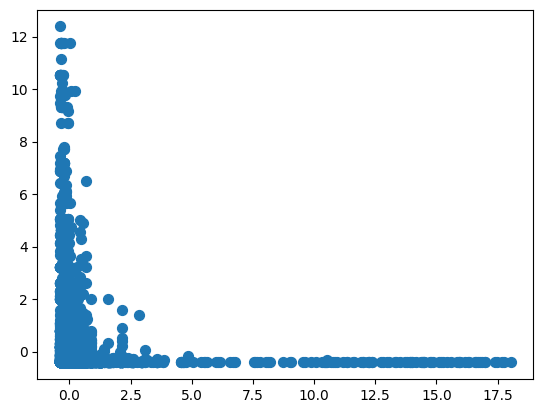

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

plt.show()

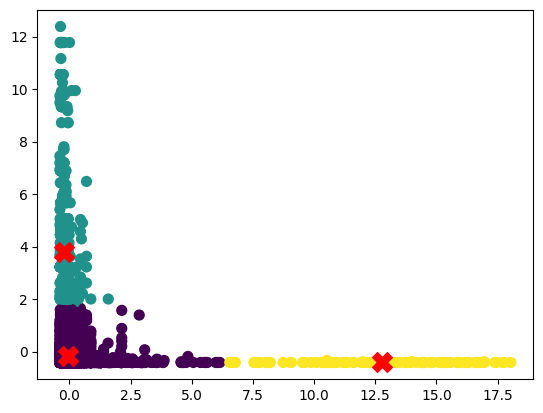

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Визуализируем результаты кластеризации
AUTO_N_INIT = 'auto'
range_n_clusters = range(2,10)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=AUTO_N_INIT)
    cluster_labels = kmeans.fit_predict(X)

    # Вычисление силуэтной оценки
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Определение оптимального числа кластеров для данных Wine
optimal_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print('Оптимальное число кластеров:', optimal_n_clusters)
silhouette_scores

Оптимальное число кластеров: 2


[(2, 0.9351570999076072),
 (3, 0.8407322884439501),
 (4, 0.7625179467587005),
 (5, 0.7656262147037891),
 (6, 0.5219535525769775),
 (7, 0.5699699539469195),
 (8, 0.563424212374467),
 (9, 0.5368036785475876)]

In [ ]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
silhouette_scores

[(2, 0.9351570999076072),
 (3, 0.8407322884439501),
 (4, 0.7625179467587005),
 (5, 0.7656262147037891),
 (6, 0.5219535525769775),
 (7, 0.5699699539469195),
 (8, 0.563424212374467),
 (9, 0.5368036785475876)]

<ipython-input-51-42a743389b23>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(list(range(2,10)), [item[1] for item in silhouette_scores], cmap='viridis')


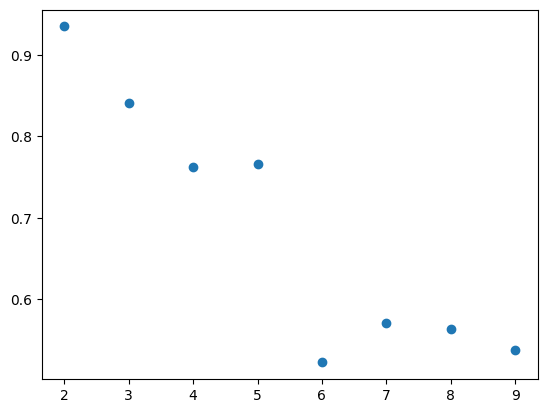

In [ ]:
plt.scatter(list(range(2,10)), [item[1] for item in silhouette_scores], cmap='viridis')

In [ ]:
print(cluster_centers) # центры кластеров в двумерном пространстве

[[-0.05339662 -0.17574968]
 [-0.23495248  3.79230291]
 [12.78779098 -0.411051  ]]


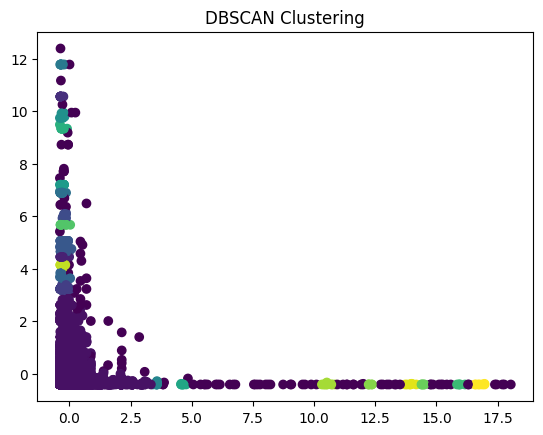

In [ ]:
from sklearn.cluster import DBSCAN


# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
df_cluster = df_cluster.dropna(subset=['UnitPrice', 'Quantity'])
df_cluster['dbscan_labels'] = labels

In [ ]:
df_cluster.groupby('dbscan_labels', observed=True).agg(['count','mean', 'std', 'min', 'max']).T

<ipython-input-55-672d4169e9ff>:1: FutureWarning: ['Description', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_cluster.groupby('dbscan_labels', observed=True).agg(['count','mean', 'std', 'min', 'max']).T


dbscan_labels           -1             0          1          2           3   \
Quantity  count  108.000000  17427.000000  58.000000  11.000000  133.000000   
          mean     2.005230     -0.127155   4.445816  10.551992    3.229172   
          std      3.564209      0.474965   0.000000   0.000000    0.027806   
          min     -0.413683     -0.413683   4.445816  10.551992    3.148253   
          max     12.383845      2.995599   4.445816  10.551992    3.377235   
UnitPrice count  108.000000  17427.000000  58.000000  11.000000  133.000000   
          mean     6.166961     -0.066391  -0.265186  -0.343179   -0.279412   
          std      5.949531      0.353283   0.087168   0.043897    0.080080   
          min     -0.389608     -0.389608  -0.370766  -0.371758   -0.389608   
          max     18.038894      3.328223  -0.010784  -0.245814    0.031858   

dbscan_labels          4          5         6          7          8   ...  \
Quantity  count  7.000000  57.000000  9.000000  39.000000   9.000000  ...   
          mean   6.023245   4.811383  3.682544   6.889591  11.773227  ...   
          std    0.083095   0.192184  0.088135   0.008148   0.000000  ...   
          min    5.921475   4.649355  3.631659   6.888286  11.773227  ...   
          max    6.125014   5.056433  3.835198   6.939171  11.773227  ...   
UnitPrice count  7.000000  57.000000  9.000000  39.000000   9.000000  ...   
          mean  -0.195946  -0.243726 -0.227302  -0.307527  -0.327573  ...   
          std    0.063086   0.108711  0.155942   0.046495   0.055828  ...   
          min   -0.284490  -0.389608 -0.389608  -0.389608  -0.377708  ...   
          max   -0.136728   0.083426  0.031858  -0.136728  -0.203171  ...   

dbscan_labels          12        13         14         15         16  \
Quantity  count  7.000000  9.000000   5.000000  23.000000   5.000000   
          mean  -0.410048  9.347718  -0.413683   5.667051  -0.413683   
          std    0.009616  0.050885   0.000000   0.000000   0.000000   
          min   -0.413683  9.330757  -0.413683   5.667051  -0.413683   
          max   -0.388241  9.483411  -0.413683   5.667051  -0.413683   
UnitPrice count  7.000000  9.000000   5.000000  23.000000   5.000000   
          mean   4.627757 -0.284600  15.965279  -0.300141  14.444429   
          std    0.072655  0.085219   0.120617   0.095066   0.052553   
          min    4.564855 -0.389608  15.841318  -0.364816  14.388498   
          max    4.767159 -0.097061  16.163616   0.031858  14.510475   

dbscan_labels           17         18        19         20         21  
Quantity  count   5.000000  10.000000  6.000000   7.000000   7.000000  
          mean   -0.413683  -0.400962  4.089622  -0.406414  -0.410048  
          std     0.000000   0.027481  0.085147   0.012415   0.009616  
          min    -0.413683  -0.413683  3.936968  -0.413683  -0.413683  
          max    -0.413683  -0.337356  4.140507  -0.388241  -0.388241  
UnitPrice count   5.000000  10.000000  6.000000   7.000000   7.000000  
          mean   12.284735  10.554441 -0.279862  13.930055  16.780586  
          std     0.071901   0.168550  0.105968   0.146472   0.160870  
          min    12.213730  10.319610 -0.368783  13.721093  16.572190  
          max    12.363475  10.861070 -0.140695  14.173302  16.964898  

[10 rows x 23 columns]

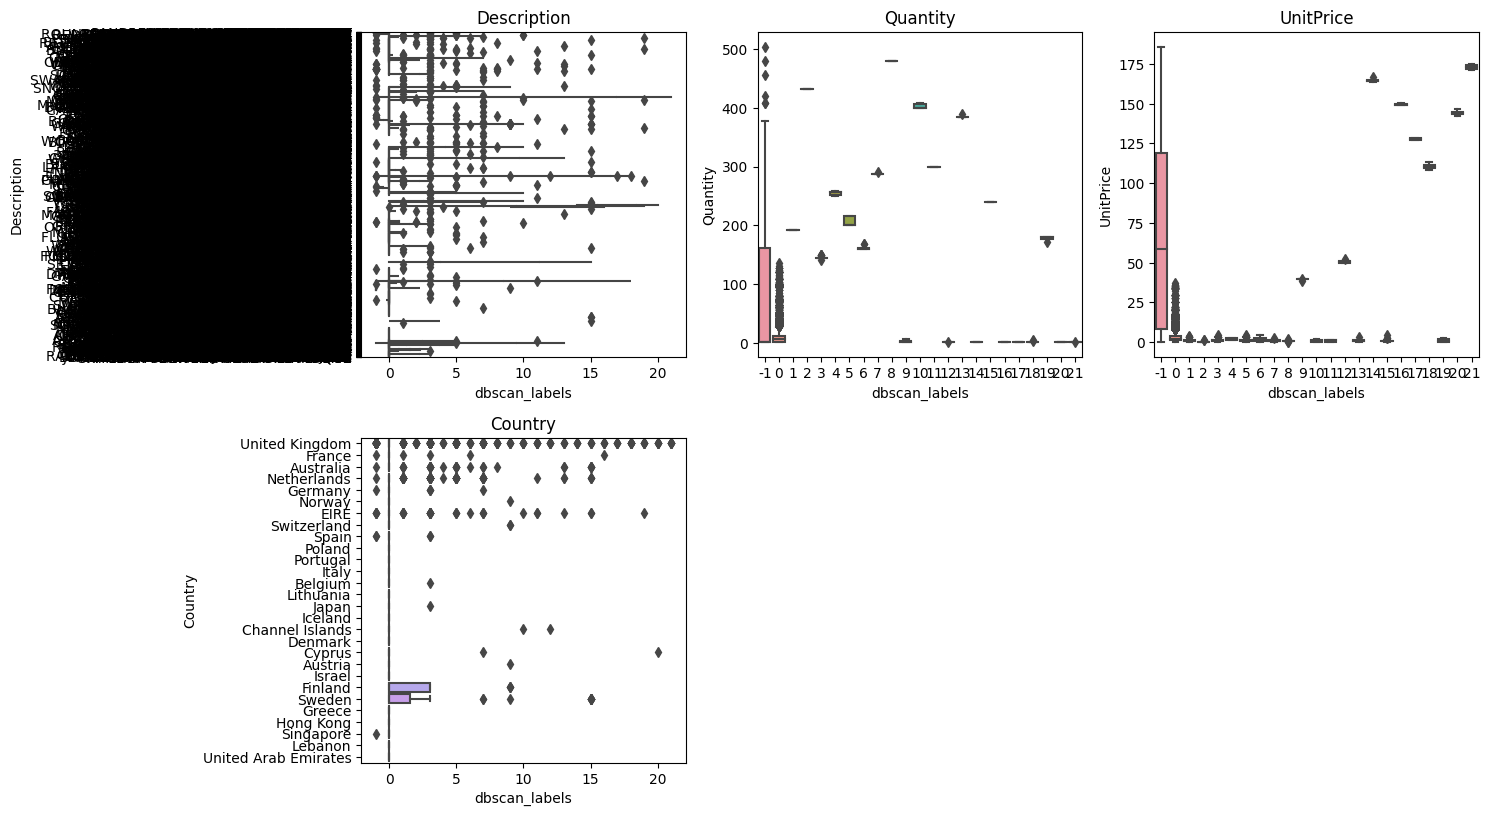

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

# Создание boxplot для каждой колонки с разделением по меткам кластеров
for i, column in enumerate(df_cluster.columns[:-1], 1):  # Исключаем последний столбец 'labels'
    plt.subplot(5, 3, i)  # Установка 5 строк и 3 столбцов для графиков
    sns.boxplot(data=df_cluster, x='dbscan_labels', y=df[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [ ]:
df_cluster

,Description,Quantity,UnitPrice,Country,dbscan_labels
19,RECIPE BOX WITH METAL HEART,-0.337356,0.398782,United Kingdom,0
26,ALARM CLOCK BAKELIKE PINK,0.171492,-0.017726,France,0
27,ALARM CLOCK BAKELIKE RED,0.171492,-0.017726,France,0
28,ALARM CLOCK BAKELIKE GREEN,-0.133817,-0.017726,France,0
29,PANDA AND BUNNIES STICKER SHEET,-0.133817,-0.305315,France,0
...,...,...,...,...,...
98964,RED HANGING HEART T-LIGHT HOLDER,0.375031,-0.136728,EIRE,0
98966,CERAMIC CAKE STAND + HANGING CAKES,-0.235586,0.453325,EIRE,0
98967,SMALL POPCORN HOLDER,9.737835,-0.318207,EIRE,10
98968,COFFEE MUG APPLES DESIGN,0.476801,-0.181354,EIRE,0


In [ ]:
df

,Description,Quantity,UnitPrice,Country
19,RECIPE BOX WITH METAL HEART,4.0,7.95,United Kingdom
29,PANDA AND BUNNIES STICKER SHEET,12.0,0.85,France
30,STARS GIFT TAPE,24.0,0.65,France
31,INFLATABLE POLITICAL GLOBE,48.0,0.85,France
33,SET/2 RED RETROSPOT TEA TOWELS,18.0,2.95,France
...,...,...,...,...
541814,ROLL WRAP VINTAGE SPOT,25.0,1.25,United Kingdom
541833,JUMBO BAG VINTAGE CHRISTMAS,30.0,1.79,United Kingdom
541865,LUNCH BAG RED RETROSPOT,40.0,1.45,United Kingdom
541867,RED FLOCK LOVE HEART PHOTO FRAME,72.0,0.72,United Kingdom


In [ ]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here